In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import StackingClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [3]:
df.shape

(3000, 14)

In [4]:
df.ndim

2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


In [7]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [8]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

###### EDA

In [9]:
def catdet(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Most recurring value in {col} is {st.mode(df[col])}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    percentage = df[col].value_counts()
    label = list(df[col].value_counts().index)

    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.countplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'count of {col}')
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')
    ax[1].set_title(f'share of {col}')

def condet(col):
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of the {col} is {df[col].median()}")
    print(f"Mode of the {col} is {st.mean(df[col])}")
    print(f"Standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.boxplot(x = df[col], ax = ax[0], color = 'brown')
    ax[0].set_title(f'count of {col}')
    
    sns.histplot(x = df[col],bins = 10, color = 'green')
    ax[1].set_title(f'share of {col}')
    
def catcont(col1, col2):
    label = list(df[col1].value_counts().index)
    percentage = df[col1].value_counts()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    sns.countplot(x = df[col1], hue = df[col2], ax = ax[0])
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')

Unique values in Grade are: ['D' 'C' 'B' 'A' 'E']
Most recurring value in Grade is D
Number of missing values in Grade are 0


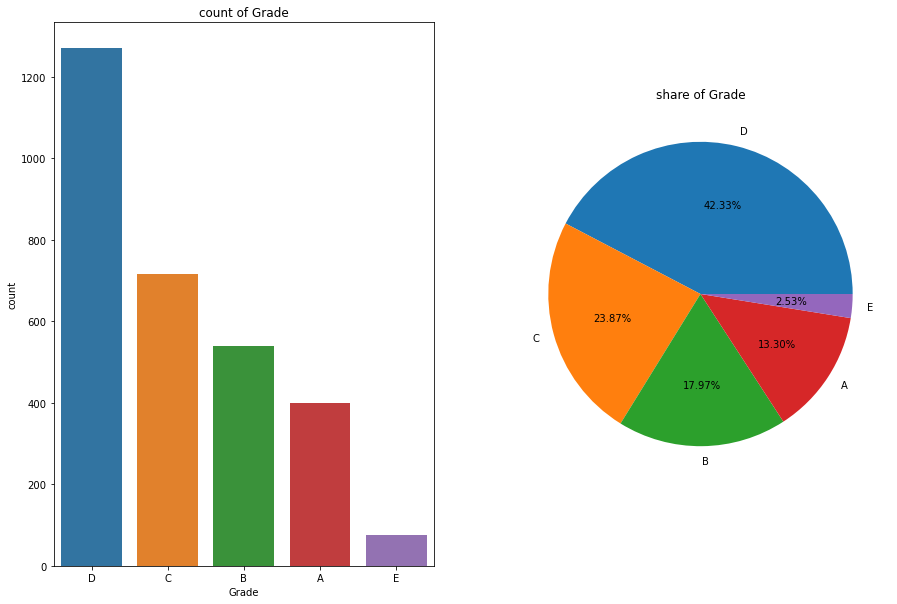

In [10]:
catdet('Grade')

In [11]:
# in the above visuals, we can see that the Grade E houses are the lowest in quantity amounting to only 2.53% 
# and D graded are the highest amounting to 42.33%

Unique values in roof are: ['NO' 'YES']
Most recurring value in roof is YES
Number of missing values in roof are 0


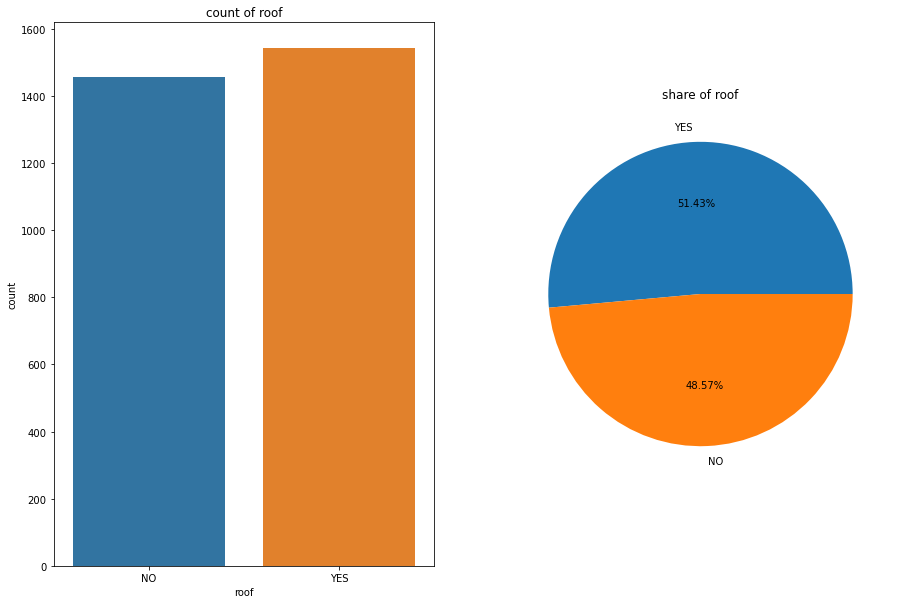

In [12]:
catdet('roof')

In [13]:
# in the above visuals we can see that 51.43% of the houses have roofs and 48.57% dont

Mean of Area(total) is 325.117
Median of the Area(total) is 325.0
Mode of the Area(total) is 325.117
Standard deviation of the Area(total) is 20.50774244442138
Number of missing values in Area(total) are 0


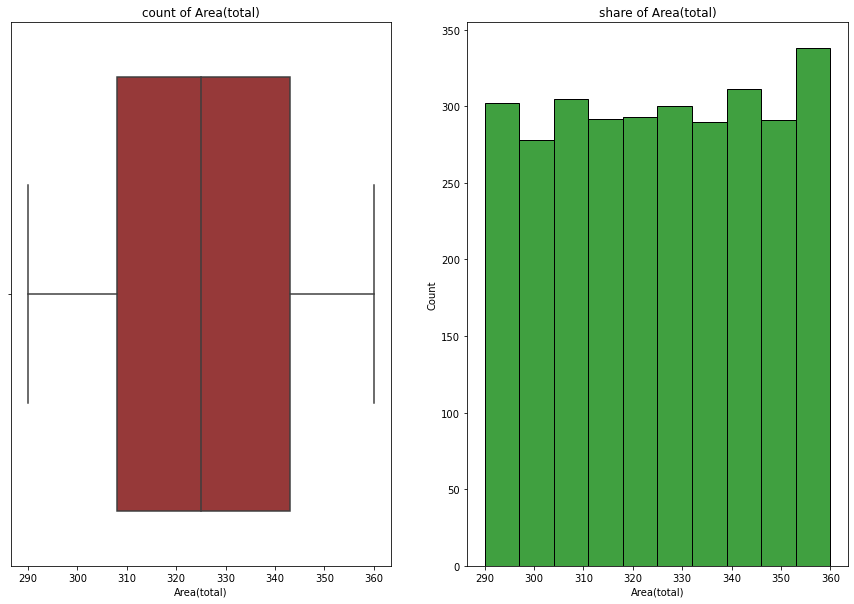

In [14]:
condet('Area(total)')

In [15]:
# in the above visuals we can see the spread of area data

Mean of Expected price is 3782.9383333333335
Median of the Expected price is 3771.0
Mode of the Expected price is 3782.9383333333335
Standard deviation of the Expected price is 567.1899952345067
Number of missing values in Expected price are 0


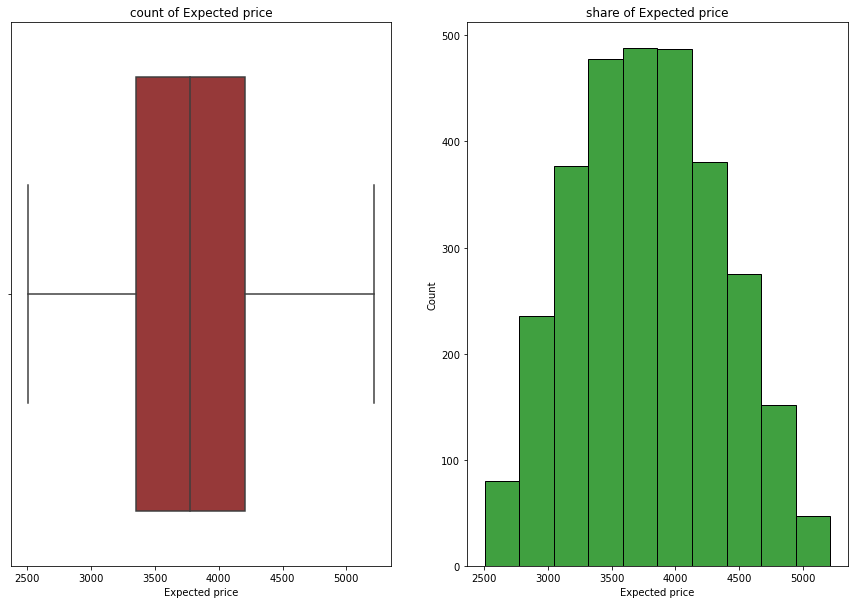

In [16]:
condet('Expected price')

In [17]:
# in the above visuals we can see the spread of expected price data. the data is normally distributed

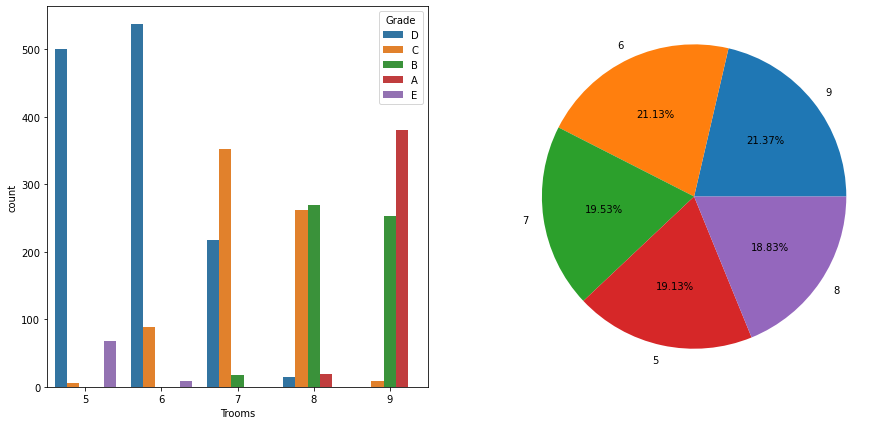

In [18]:
catcont('Trooms', 'Grade')

In [19]:
# in the above visuals we can see the total number of rooms according to the grade.
# D graded are the highest number of houses with 6 rooms

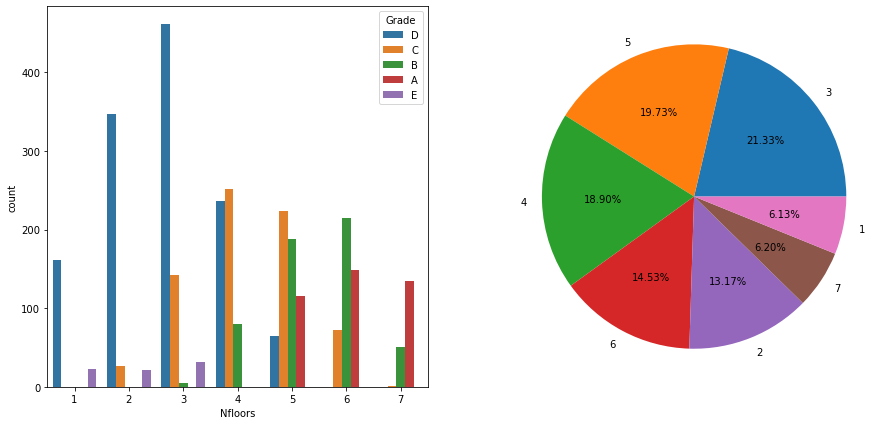

In [20]:
catcont('Nfloors', 'Grade')

In [21]:
# in the above visuals we can see the total number of floors according to grades. 
# D graded houses are the highest in number with 3 floors

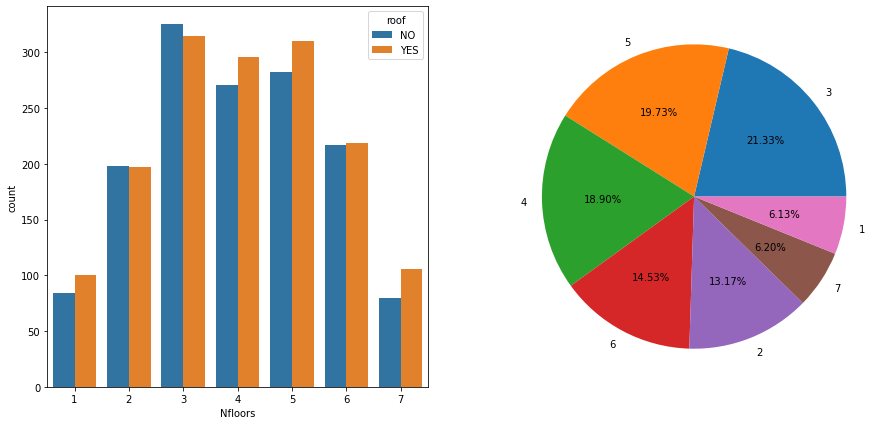

In [22]:
catcont('Nfloors', 'roof')

In [23]:
# in the above visuals we can see the number of floors according to house with and witout roofs
# 3 floored house are the most in number with no roofs and with roofs as well.

<AxesSubplot:>

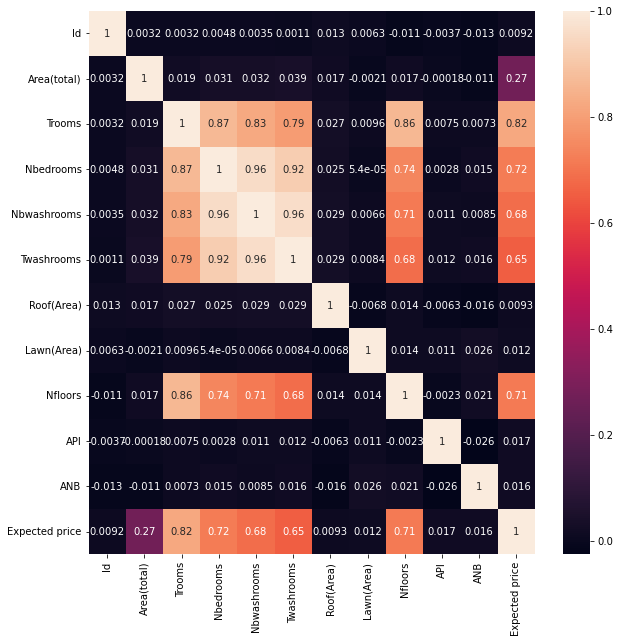

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)

###### label encoding

In [25]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [26]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


###### standardising data

In [27]:
#df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

In [28]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


###### dividing data in dependent, independent and train-test sets

In [29]:
x = df[['Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Expected price']]
y = df['Grade']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 1)

In [31]:
for i in [xtrain, xtest, ytrain, ytest]:
    print(i.shape)

(2100, 6)
(900, 6)
(2100,)
(900,)


In [32]:
ytrain

1045    3
2717    2
2835    1
2913    3
959     1
       ..
2763    2
905     2
1096    3
235     2
1061    1
Name: Grade, Length: 2100, dtype: int32

###### Logistic Regression

In [33]:
logr = LogisticRegression()

In [34]:
logr.fit(xtrain, ytrain)

LogisticRegression()

In [35]:
ypred = logr.predict(xtest)
ypred

array([2, 3, 3, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 3, 1, 3, 0, 2, 3, 3, 1, 3,
       2, 0, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 1, 0, 2, 3, 1, 1, 3, 3, 3, 2,
       3, 1, 2, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 1, 2, 3, 0, 2,
       1, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 2, 3,
       3, 0, 1, 2, 2, 2, 0, 2, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3, 2, 3,
       1, 0, 1, 1, 3, 3, 3, 1, 0, 3, 3, 2, 3, 2, 2, 3, 1, 3, 2, 3, 2, 2,
       3, 0, 0, 2, 3, 2, 0, 3, 3, 0, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 2, 3,
       0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 2, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3, 2, 2, 3, 3, 0, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3,
       1, 2, 3, 1, 3, 2, 3, 1, 2, 2, 3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 0, 1, 2, 3, 3, 3, 2, 3, 1,
       1, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       0, 2, 2, 1, 3, 1, 3, 3, 1, 3, 1, 2, 1, 3, 3, 0, 2, 3, 0, 3, 2, 0,
       1, 3, 0, 1, 3, 0, 3, 2, 1, 3, 3, 3, 3, 1, 1,

In [36]:
for a, b in zip(ytest, ypred):
    print(f'{b} was predicted against the actual value of {a}')

2 was predicted against the actual value of 2
3 was predicted against the actual value of 3
3 was predicted against the actual value of 2
0 was predicted against the actual value of 1
2 was predicted against the actual value of 2
2 was predicted against the actual value of 1
1 was predicted against the actual value of 1
2 was predicted against the actual value of 1
1 was predicted against the actual value of 0
1 was predicted against the actual value of 3
0 was predicted against the actual value of 1
1 was predicted against the actual value of 0
0 was predicted against the actual value of 0
3 was predicted against the actual value of 3
1 was predicted against the actual value of 0
3 was predicted against the actual value of 3
0 was predicted against the actual value of 0
2 was predicted against the actual value of 1
3 was predicted against the actual value of 4
3 was predicted against the actual value of 3
1 was predicted against the actual value of 0
3 was predicted against the actual

In [37]:
score = logr.score(xtest, ytest)

In [38]:
scorepercent = round((score*100), 2)
print(f'{scorepercent}%')

52.22%


In [39]:
logr.coef_

array([[-0.05163568,  0.00379712,  0.00908614,  0.01010341,  0.00955146,
         0.00421839],
       [-0.03499407,  0.00431885,  0.00421948,  0.00426107,  0.00440917,
         0.00304694],
       [ 0.00276308, -0.00035379,  0.00031763,  0.00041205, -0.00011989,
         0.00014077],
       [ 0.03581672, -0.00697862, -0.01153327, -0.01225978, -0.01162086,
        -0.00262646],
       [ 0.04804994, -0.00078356, -0.00208999, -0.00251675, -0.00221988,
        -0.00477963]])

In [40]:
logr.intercept_

array([-0.00039663, -0.00022938, -0.00022472,  0.00060284,  0.0002479 ])

In [41]:
confusion_matrix(ytest, ypred)

array([[ 44,  46,  39,   1,   0],
       [ 44,  56,  63,  23,   0],
       [ 14,  30,  58,  94,   0],
       [  2,   7,  44, 312,   0],
       [  0,   0,   1,  22,   0]], dtype=int64)

In [42]:
precision_score(ytest, ypred, average = 'weighted')

0.4859286811000153

######  random forest classifier

In [43]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 3)

In [44]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
ypred = rf.predict(xtest)
ypred

array([2, 3, 3, 1, 3, 2, 1, 2, 0, 2, 1, 0, 0, 3, 0, 3, 0, 1, 3, 3, 0, 3,
       0, 0, 3, 0, 3, 1, 3, 0, 3, 2, 3, 2, 2, 1, 2, 3, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 0, 3, 3, 0, 2,
       2, 1, 3, 1, 1, 1, 3, 3, 0, 3, 3, 2, 2, 1, 2, 3, 3, 2, 0, 1, 2, 3,
       3, 1, 2, 3, 0, 3, 2, 1, 2, 3, 2, 3, 3, 0, 1, 2, 2, 2, 3, 3, 1, 3,
       1, 0, 1, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 3, 2,
       2, 0, 0, 2, 2, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 3, 3, 2, 3,
       0, 2, 3, 3, 3, 2, 3, 3, 3, 3, 0, 2, 1, 1, 1, 3, 0, 3, 1, 1, 3, 1,
       3, 3, 2, 2, 3, 0, 1, 3, 3, 0, 2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3,
       2, 0, 0, 2, 3, 2, 2, 3, 0, 2, 1, 2, 3, 1, 1, 2, 3, 3, 3, 2, 3, 2,
       1, 1, 3, 0, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3,
       1, 3, 1, 2, 3, 2, 3, 2, 1, 3, 2, 2, 0, 3, 1, 1, 0, 2, 1, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 3, 0, 3, 3, 3, 3, 2, 0,

In [46]:
for a, b in zip(ytest, ypred):
    print(f'{b} was predicted for {a}')

2 was predicted for 2
3 was predicted for 3
3 was predicted for 2
1 was predicted for 1
3 was predicted for 2
2 was predicted for 1
1 was predicted for 1
2 was predicted for 1
0 was predicted for 0
2 was predicted for 3
1 was predicted for 1
0 was predicted for 0
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
1 was predicted for 1
3 was predicted for 4
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
1 was predicted for 1
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
2 was predicted for 1
3 was predicted for 3
2 was predicted for 3
2 was predicted for 2
1 was predicted for 2
2 was predicted for 3
3 was predicted for 3
0 was predicted for 0
1 was predicted for 1
3 was predicted for 3
3 was predicted for 3
3 was predicted for 3
2 was predicted for 3
3 was predicted for 3
1 was pred

In [47]:
scorper = round(rf.score(xtest, ytest)*100,2)
print(f'{scorper}%')

77.44%


In [48]:
accuracy_score(ytest, ypred)

0.7744444444444445

In [49]:
precision_score(ytest, ypred, average='weighted')

0.7555991771327277

In [50]:
recall_score(ytest, ypred, average='weighted')

0.7744444444444445

In [51]:
f1_score(ytest, ypred, average='weighted')

0.7628607449193503

######  Decision tree classifier

In [52]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [53]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [54]:
ypred = dt.predict(xtest)

In [55]:
for a, b in zip(ytest, ypred):
    print(f'{b} was predicted for {a}')

2 was predicted for 2
3 was predicted for 3
2 was predicted for 2
1 was predicted for 1
2 was predicted for 2
1 was predicted for 1
2 was predicted for 1
1 was predicted for 1
0 was predicted for 0
2 was predicted for 3
1 was predicted for 1
0 was predicted for 0
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
1 was predicted for 1
3 was predicted for 4
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
0 was predicted for 0
0 was predicted for 0
4 was predicted for 3
0 was predicted for 0
3 was predicted for 3
1 was predicted for 1
3 was predicted for 3
0 was predicted for 0
3 was predicted for 3
2 was predicted for 1
3 was predicted for 3
2 was predicted for 3
2 was predicted for 2
1 was predicted for 2
3 was predicted for 3
3 was predicted for 3
0 was predicted for 0
1 was predicted for 1
3 was predicted for 3
3 was predicted for 3
3 was predicted for 3
2 was predicted for 3
3 was predicted for 3
2 was pred

In [56]:
scor = dt.score(xtest, ytest)
print(f'{round(scor*100, 2)}%')

73.89%


In [57]:
print(f"""
{accuracy_score(ytest, ypred)}
{precision_score(ytest, ypred, average='weighted')}
{recall_score(ytest, ypred, average='weighted')}
{f1_score(ytest, ypred, average='weighted')}""")


0.7388888888888889
0.7523450193365103
0.7388888888888889
0.7444588753201089


In [58]:
from sklearn.ensemble import StackingClassifier      
from sklearn.neighbors import KNeighborsClassifier       
from sklearn.tree import DecisionTreeClassifier           
from sklearn.svm import SVC                               
from sklearn.naive_bayes import GaussianNB                
from sklearn.linear_model import LogisticRegression 

In [59]:
def get_stacking():
    level0=list()
    level0.append(('KN', KNeighborsClassifier()))
    level0.append(('DT', DecisionTreeClassifier()))
    level0.append(('SVC', SVC()))
    level0.append(('NB', GaussianNB()))

    level1 = LogisticRegression()
    s_scores = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return s_scores


In [60]:
from sklearn.model_selection import cross_validate
new_model = get_stacking()
scoring=['accuracy','precision_weighted','recall_weighted','f1_weighted']
stack_scores = cross_validate(new_model, x,y, scoring=scoring,  n_jobs=-1, error_score='raise')

In [61]:
stack_scores

{'fit_time': array([4.28158879, 4.30957913, 4.29059029, 4.34833145, 2.74475121]),
 'score_time': array([0.42699695, 0.45599699, 0.39599276, 0.29599023, 0.23399878]),
 'test_accuracy': array([0.785     , 0.82166667, 0.805     , 0.785     , 0.78833333]),
 'test_precision_weighted': array([0.76834188, 0.79853644, 0.78664395, 0.76674644, 0.79052787]),
 'test_recall_weighted': array([0.785     , 0.82166667, 0.805     , 0.785     , 0.78833333]),
 'test_f1_weighted': array([0.77601132, 0.80932429, 0.79409726, 0.77460938, 0.77914293])}

In [65]:
scorer = pd.DataFrame(stack_scores)

In [66]:
scorer.set_index([pd.Index(['KNeigbour', 'DecisionTree', 'SVC', 'NaiveB', 'LogisticR'])])

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
KNeigbour,4.281589,0.426997,0.785000,0.768342,0.785000,0.776011
DecisionTree,4.309579,0.455997,0.821667,0.798536,0.821667,0.809324
SVC,4.290590,0.395993,0.805000,0.786644,0.805000,0.794097
NaiveB,4.348331,0.295990,0.785000,0.766746,0.785000,0.774609
LogisticR,2.744751,0.233999,0.788333,0.790528,0.788333,0.779143


In [67]:
# through the above ensemble method, we can see the Decision tree is giving us the best accuracy.